# Import Packages

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import pydotplus 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB,ComplementNB

from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, KFold,StratifiedKFold

import scipy
from hyperopt import fmin, tpe, hp, partial,space_eval,rand,Trials,STATUS_OK
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing

## Subsampling the Original Questionnaire Dataset   
**(select features by the previous work in 2015)**

In [2]:
# load dataset
BRFSS_survey_data_2022 = pd.read_sas('LLCP2022.XPT')

In [3]:
BRFSS_survey_data_2022.shape

(445132, 328)

In [4]:
BRFSS_survey_data_2022

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_SMOKGRP,_LCSREC,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4
0,1.0,1.0,b'02032022',b'02',b'03',b'2022',1100.0,b'2022000001',2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,2.0,2.0
1,1.0,1.0,b'02042022',b'02',b'04',b'2022',1100.0,b'2022000002',2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,2.0,2.0,2.0
2,1.0,1.0,b'02022022',b'02',b'02',b'2022',1100.0,b'2022000003',2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,2.0
3,1.0,1.0,b'02032022',b'02',b'03',b'2022',1100.0,b'2022000004',2.022000e+09,1.0,...,3.0,2.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,9.0,9.0,2.0
4,1.0,1.0,b'02022022',b'02',b'02',b'2022',1100.0,b'2022000005',2.022000e+09,1.0,...,4.0,NaN,1.0,1.000000e+01,1.0,1.400000e+02,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,78.0,11.0,b'12192022',b'12',b'19',b'2022',1100.0,b'2022001527',2.022002e+09,NaN,...,4.0,NaN,7.0,9.000000e+02,9.0,9.990000e+04,9.0,NaN,NaN,1.0
445128,78.0,11.0,b'12212022',b'12',b'21',b'2022',1100.0,b'2022001528',2.022002e+09,NaN,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,1.0
445129,78.0,11.0,b'11292022',b'11',b'29',b'2022',1100.0,b'2022001529',2.022002e+09,NaN,...,1.0,NaN,7.0,9.000000e+02,9.0,9.990000e+04,9.0,2.0,2.0,2.0
445130,78.0,11.0,b'12082022',b'12',b'08',b'2022',1100.0,b'2022001530',2.022002e+09,NaN,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,1.0


The raw data consists of 328 features, many of which are duplicated or have been processed. According to the research and paper about the questionnaire data in 2015, and by join 2015-features and the 2022-data in codebook.ipynb, we selected some of those features, which might be most usefull among all of the 328 features (including diabets label)

In [5]:
selected = BRFSS_survey_data_2022[['DIABETE4',
                                   '_SEX',  
                                   '_AGEG5YR',
                                   '_EDUCAG', 
                                   '_INCOMG1', 
                                   'GENHLTH', 
                                   'MENTHLTH',
                                   'PHYSHLTH', 
                                   '_BMI5',
                                   '_SMOKGRP',
                                   '_DRNKWK2',
                                   'EXERANY2',
                                   '_MICHD','_ASTHMS1', '_DRDXAR2'
                                  ]]

In [6]:
# store a backup file
selected.to_csv('selected.csv')

In [7]:
selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DIABETE4  445129 non-null  float64
 1   _SEX      445132 non-null  float64
 2   _AGEG5YR  445132 non-null  float64
 3   _EDUCAG   445132 non-null  float64
 4   _INCOMG1  445132 non-null  float64
 5   GENHLTH   445129 non-null  float64
 6   MENTHLTH  445129 non-null  float64
 7   PHYSHLTH  445127 non-null  float64
 8   _BMI5     396326 non-null  float64
 9   _SMOKGRP  409670 non-null  float64
 10  _DRNKWK2  445132 non-null  float64
 11  EXERANY2  445130 non-null  float64
 12  _MICHD    440111 non-null  float64
 13  _ASTHMS1  445132 non-null  float64
 14  _DRDXAR2  442499 non-null  float64
dtypes: float64(15)
memory usage: 50.9 MB


## Missing Values

In [8]:
selected.isnull().sum()

DIABETE4        3
_SEX            0
_AGEG5YR        0
_EDUCAG         0
_INCOMG1        0
GENHLTH         3
MENTHLTH        3
PHYSHLTH        5
_BMI5       48806
_SMOKGRP    35462
_DRNKWK2        0
EXERANY2        2
_MICHD       5021
_ASTHMS1        0
_DRDXAR2     2633
dtype: int64

In [9]:
sum(selected.isnull().sum())/len(selected)

0.20654098110223484

the missing values are only 20% of the total, so we will just delete them 

In [10]:
selected.dropna(inplace=True)
selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375996 entries, 1 to 445131
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DIABETE4  375996 non-null  float64
 1   _SEX      375996 non-null  float64
 2   _AGEG5YR  375996 non-null  float64
 3   _EDUCAG   375996 non-null  float64
 4   _INCOMG1  375996 non-null  float64
 5   GENHLTH   375996 non-null  float64
 6   MENTHLTH  375996 non-null  float64
 7   PHYSHLTH  375996 non-null  float64
 8   _BMI5     375996 non-null  float64
 9   _SMOKGRP  375996 non-null  float64
 10  _DRNKWK2  375996 non-null  float64
 11  EXERANY2  375996 non-null  float64
 12  _MICHD    375996 non-null  float64
 13  _ASTHMS1  375996 non-null  float64
 14  _DRDXAR2  375996 non-null  float64
dtypes: float64(15)
memory usage: 45.9 MB


Besides those nulls, the questionnaire itself consists of empty values for those who doesn't want to answer the questions. We will remove those empty answers depending on the codebook.

In [11]:
# 1: Yes 
# 2: Yes, but pregnant -> combine it with 1
# 3: No                -> change to 0
# 4: Pre-diabetes      -> change to 2 
# so we will have three classes to forecast
selected['DIABETE4'] = selected['DIABETE4'].replace({2:1,3:0,4:2})
selected = selected[selected.DIABETE4 != 7]
selected = selected[selected.DIABETE4 != 9]

In [12]:
# 14: Don’t know/Refused/Missing
selected = selected[selected._AGEG5YR != 14]

In [13]:
# 1: Below high school
# 2: High school
# 3: Attend college
# 4: College graduate
# 9: Don’t know/Not sure/Missing
selected = selected[selected._EDUCAG != 9]

In [14]:
# 1: Less than 15,000,
# 2: 15,000-25,000,
# 3: 25,000-35,000,
# 4: 35,000-50,000,
# 5: 50,000-100,000,
# 6: 100,000-200,000,
# 7: 200,000 or more
selected = selected[selected._INCOMG1 != 9]

In [15]:
# 1: Excellent,
# 2: Very good,
# 3: Good,
# 4: Fair,
# 5: Poor

selected = selected[selected.GENHLTH != 7]
selected = selected[selected.GENHLTH != 9]

In [16]:
# Number of days mental health is not good in past 30 days as INT
selected = selected[selected.MENTHLTH != 77]
selected = selected[selected.MENTHLTH != 99]
selected['MENTHLTH'] = selected['MENTHLTH'].replace({88:0})

In [17]:
# Number of days physical health is not good in past 30 days as INT
selected = selected[selected.PHYSHLTH != 77]
selected = selected[selected.PHYSHLTH != 99]
selected['PHYSHLTH'] = selected['PHYSHLTH'].replace({88:0})

In [18]:
# 1: Yes,
# 2: No
selected = selected[selected.EXERANY2 != 7]
selected = selected[selected.EXERANY2 != 9]

In [19]:
# 99900: Don’t know/Not sure/Refused/Missing
selected = selected[selected._DRNKWK2 < 99900]

In [20]:
# 1: Current,
# 2: Former,
# 3: Never
selected = selected[selected._ASTHMS1 != 9]

In [21]:
selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291267 entries, 1 to 445130
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DIABETE4  291267 non-null  float64
 1   _SEX      291267 non-null  float64
 2   _AGEG5YR  291267 non-null  float64
 3   _EDUCAG   291267 non-null  float64
 4   _INCOMG1  291267 non-null  float64
 5   GENHLTH   291267 non-null  float64
 6   MENTHLTH  291267 non-null  float64
 7   PHYSHLTH  291267 non-null  float64
 8   _BMI5     291267 non-null  float64
 9   _SMOKGRP  291267 non-null  float64
 10  _DRNKWK2  291267 non-null  float64
 11  EXERANY2  291267 non-null  float64
 12  _MICHD    291267 non-null  float64
 13  _ASTHMS1  291267 non-null  float64
 14  _DRDXAR2  291267 non-null  float64
dtypes: float64(15)
memory usage: 35.6 MB


In [22]:
len(selected)/445132

0.6543384883585094

Although only 65% of the original data has been kept, it is normal for questionnaire data

## Change the Feature Names

In [23]:
selected.rename(columns = {'DIABETE4':'Diabetes', 
                           '_SEX':'Gender',  
                           '_AGEG5YR':'Age',
                           '_BMI5':'BMI', 
                           '_EDUCAG':'Education', 
                           '_INCOMG1':'Income',
                           '_SMOKGRP':'Smoker', 
                           '_DRNKWK2':'Drinks',
                           'EXERANY2':'Exercise', 
                           'GENHLTH':'GHealth',
                           'MENTHLTH':'MHealth',
                           'PHYSHLTH':'PHealth', 
                           '_MICHD':'Heart',
                           '_ASTHMS1':'Asthma', 
                           '_DRDXAR2':'Arthritis'
                          },
                inplace=True)
selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291267 entries, 1 to 445130
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Diabetes   291267 non-null  float64
 1   Gender     291267 non-null  float64
 2   Age        291267 non-null  float64
 3   Education  291267 non-null  float64
 4   Income     291267 non-null  float64
 5   GHealth    291267 non-null  float64
 6   MHealth    291267 non-null  float64
 7   PHealth    291267 non-null  float64
 8   BMI        291267 non-null  float64
 9   Smoker     291267 non-null  float64
 10  Drinks     291267 non-null  float64
 11  Exercise   291267 non-null  float64
 12  Heart      291267 non-null  float64
 13  Asthma     291267 non-null  float64
 14  Arthritis  291267 non-null  float64
dtypes: float64(15)
memory usage: 35.6 MB


In [24]:
# coz we removed many rows, reset index is needed
selected.reset_index(drop=True, inplace=True)
selected.head()

,Diabetes,Gender,Age,Education,Income,GHealth,MHealth,PHealth,BMI,Smoker,Drinks,Exercise,Heart,Asthma,Arthritis
0,0.0,2.0,13.0,2.0,3.0,1.0,0.0,0.0,2657.0,4.0,5.397605e-79,2.0,2.0,3.0,2.0
1,0.0,2.0,8.0,4.0,6.0,2.0,3.0,2.0,2561.0,4.0,5.397605e-79,1.0,2.0,3.0,2.0
2,0.0,2.0,5.0,3.0,3.0,4.0,0.0,2.0,2177.0,4.0,1.400000e+02,1.0,2.0,3.0,2.0
3,0.0,2.0,13.0,4.0,5.0,2.0,0.0,0.0,2296.0,3.0,2.330000e+02,1.0,2.0,3.0,2.0
4,0.0,2.0,13.0,2.0,5.0,3.0,0.0,0.0,2781.0,4.0,5.397605e-79,2.0,2.0,3.0,1.0


In [25]:
for col in selected.columns:
    print('top count class for {}:'.format(col), selected.groupby(col).count().iloc[:,0].idxmax())

top count class for Diabetes: 0.0
top count class for Gender: 2.0
top count class for Age: 10.0
top count class for Education: 4.0
top count class for Income: 5.0
top count class for GHealth: 2.0
top count class for MHealth: 0.0
top count class for PHealth: 0.0
top count class for BMI: 2663.0
top count class for Smoker: 4.0
top count class for Drinks: 5.397605346934028e-79
top count class for Exercise: 1.0
top count class for Heart: 2.0
top count class for Asthma: 3.0
top count class for Arthritis: 2.0


## Label the Categorical Variables

In [26]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [27]:
selected.nunique()

Diabetes        3
Gender          2
Age            13
Education       4
Income          7
GHealth         5
MHealth        31
PHealth        31
BMI          3648
Smoker          4
Drinks        253
Exercise        2
Heart           2
Asthma          3
Arthritis       2
dtype: int64

some categorical variables, such as Age (age groups) has more than 3 classes, which are not good to be one-hot encoded, so we will just use label encoder

In [28]:
# continues numerical variables
num_var = ['BMI','Drinks']
for c in selected.columns:
    if c not in num_var:
        l = LabelEncoder()
        selected[c] = l.fit_transform(selected[c])
selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291267 entries, 0 to 291266
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Diabetes   291267 non-null  int64  
 1   Gender     291267 non-null  int64  
 2   Age        291267 non-null  int64  
 3   Education  291267 non-null  int64  
 4   Income     291267 non-null  int64  
 5   GHealth    291267 non-null  int64  
 6   MHealth    291267 non-null  int64  
 7   PHealth    291267 non-null  int64  
 8   BMI        291267 non-null  float64
 9   Smoker     291267 non-null  int64  
 10  Drinks     291267 non-null  float64
 11  Exercise   291267 non-null  int64  
 12  Heart      291267 non-null  int64  
 13  Asthma     291267 non-null  int64  
 14  Arthritis  291267 non-null  int64  
dtypes: float64(2), int64(13)
memory usage: 33.3 MB


## Outliers

In [29]:
selected.describe()

,Diabetes,Gender,Age,Education,Income,GHealth,MHealth,PHealth,BMI,Smoker,Drinks,Exercise,Heart,Asthma,Arthritis
count,291267.000000,291267.000000,291267.000000,291267.000000,291267.000000,291267.000000,291267.000000,291267.000000,291267.000000,291267.000000,2.912670e+05,291267.000000,291267.000000,291267.000000,291267.000000
mean,0.189479,0.504980,6.556812,2.129829,3.489705,1.525765,4.402105,4.230301,2872.341868,2.441821,3.279726e+02,0.222607,0.909980,1.747610,0.658513
std,0.445323,0.499976,3.489049,0.918536,1.603321,1.036276,8.289452,8.509546,652.253968,0.815995,9.119327e+02,0.415997,0.286212,0.630037,0.474209
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1205.000000,0.000000,5.397605e-79,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.000000,1.000000,2.000000,1.000000,0.000000,0.000000,2433.000000,2.000000,5.397605e-79,0.000000,1.000000,2.000000,0.000000
50%,0.000000,1.000000,7.000000,2.000000,4.000000,1.000000,0.000000,0.000000,2746.000000,3.000000,4.700000e+01,0.000000,1.000000,2.000000,1.000000
75%,0.000000,1.000000,9.000000,3.000000,5.000000,2.000000,5.000000,3.000000,3193.000000,3.000000,3.270000e+02,0.000000,1.000000,2.000000,1.000000
max,2.000000,1.000000,12.000000,3.000000,6.000000,4.000000,30.000000,30.000000,9765.000000,3.000000,5.320000e+04,1.000000,1.000000,2.000000,1.000000


the Drinks value range is really giant, let's plot it and have a look

In [30]:
q3 = selected.Drinks.quantile(0.75)
q1 = selected.Drinks.quantile(0.25)
iqr = q3 - q1
p95 = selected.Drinks.quantile(0.95)
p9999 = selected.Drinks.quantile(0.9999)
dmin = selected.Drinks.min()
dmax = selected.Drinks.max()
print('min : ', dmin)
print('Q1 : ', q1)
print('Q3 : ', q3)
print(' -> IQR : ', iqr)
print('95% : ', p95)
print('99.99% : ', p9999)
print('max : ', dmax)

min :  5.397605346934028e-79
Q1 :  5.397605346934028e-79
Q3 :  327.0
 -> IQR :  327.0
95% :  1400.0
99.99% :  26921.479999960866
max :  53200.0


<Axes: ylabel='Drinks'>

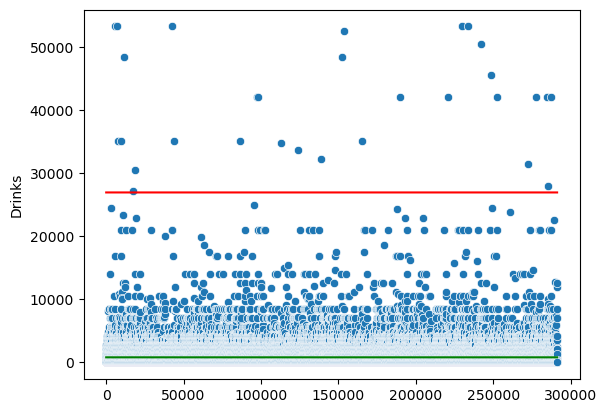

In [31]:
sns.scatterplot(data=selected.Drinks)
sns.lineplot(data=np.linspace(q3+1.5*iqr, q3+1.5*iqr, len(selected)), color='green')
sns.lineplot(data=np.linspace(p9999, p9999, len(selected)), color='red')

We could see that although the range is more than 50k, the majority of the values are located under 1k, to process this feature, we look up the codebook and found that there is another feature that group the drinker to non-heavy-drinkers and heavy-drinkers, and we could find that the number of drinks per week may has been times by 100. Then 500 drinks per week means 72 drinks per day or 3 drinks per hour day by day sounds nonsense, so we will remove values greater than 99.99%
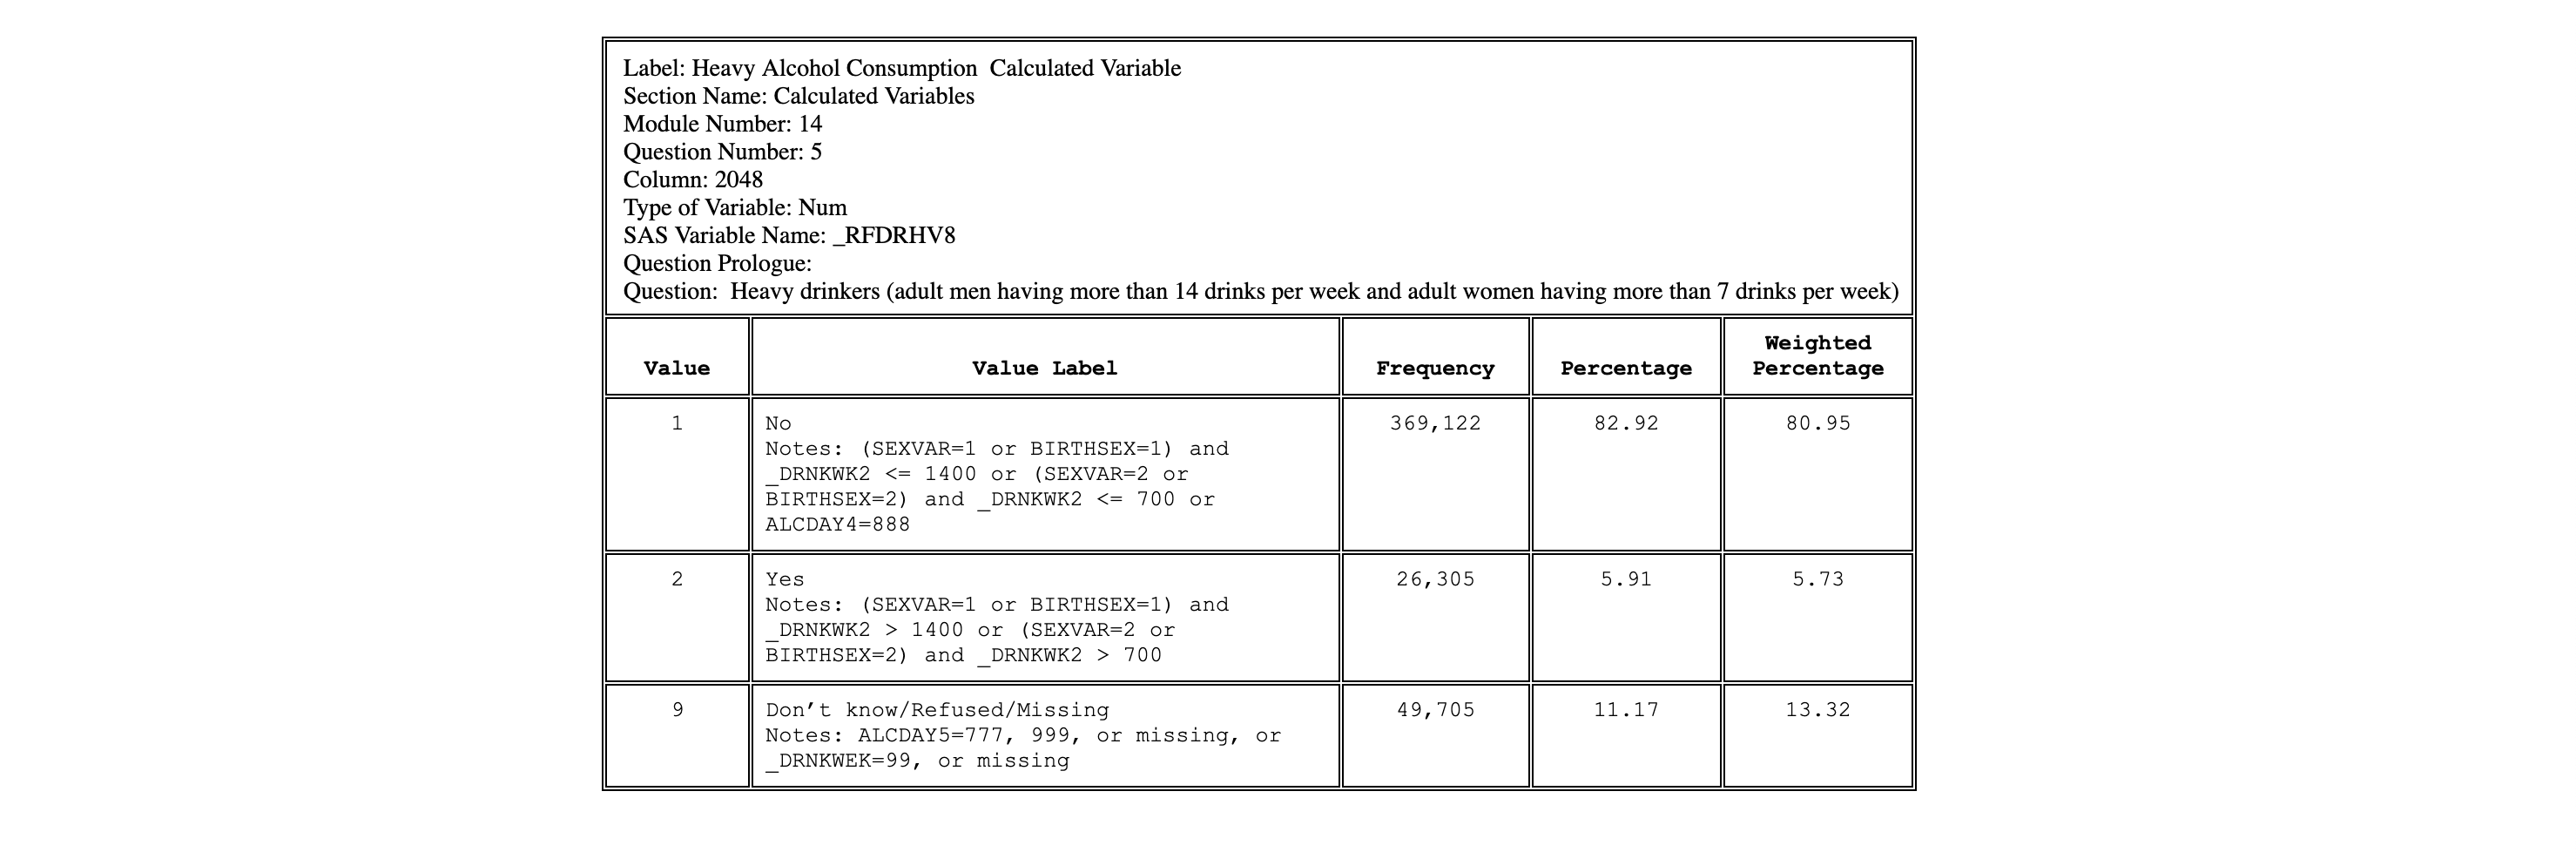

In [32]:
selected = selected[selected.Drinks < p9999]
selected.shape[0]/BRFSS_survey_data_2022.shape[0]

0.6542710926197173

In [33]:
db0 = selected[selected.Diabetes == 0].shape[0]
db1 = selected[selected.Diabetes == 1].shape[0]
db2 = selected[selected.Diabetes == 2].shape[0]
db0/selected.shape[0],db1/selected.shape[0],db2/selected.shape[0]

(0.8328921119225923, 0.1447377908713522, 0.02237009720605555)

In [34]:
selected

,Diabetes,Gender,Age,Education,Income,GHealth,MHealth,PHealth,BMI,Smoker,Drinks,Exercise,Heart,Asthma,Arthritis
0,0,1,12,1,2,0,0,0,2657.0,3,5.397605e-79,1,1,2,1
1,0,1,7,3,5,1,3,2,2561.0,3,5.397605e-79,0,1,2,1
2,0,1,4,2,2,3,0,2,2177.0,3,1.400000e+02,0,1,2,1
3,0,1,12,3,4,1,0,0,2296.0,2,2.330000e+02,0,1,2,1
4,0,1,12,1,4,2,0,0,2781.0,3,5.397605e-79,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291262,0,1,1,3,1,3,7,0,2434.0,3,5.397605e-79,0,1,2,1
291263,1,0,9,3,5,2,15,0,2986.0,3,4.000000e+02,0,1,2,0
291264,0,0,2,3,4,2,0,0,3119.0,3,1.870000e+02,0,1,2,1
291265,0,1,6,3,4,0,2,2,2866.0,3,5.397605e-79,0,1,2,1


## split the dataset to label, numerical dataset, and categorical dataset

In [35]:
label = pd.DataFrame(selected['Diabetes'])
data = selected.drop('Diabetes', axis=1)
# num only consist of continous numerical variables
num = pd.concat([data[num_var],label],axis=1).sort_values('Diabetes',ascending=False)
# cat consists of categorical variables plus discrete numerical variables (MHealth, PHealth, unhealthy days)
cat = selected.drop(num_var, axis=1)

In [36]:
label.sample(5)

,Diabetes
19414,0
153493,0
5990,0
194437,1
69899,0


In [37]:
num.sample(5)

,BMI,Drinks,Diabetes
126704,2617.0,1.170000e+02,0
275262,3219.0,5.397605e-79,0
103520,3681.0,5.397605e-79,1
37580,4283.0,5.397605e-79,0
288387,2900.0,3.270000e+02,0


In [38]:
cat.sample(5)

,Diabetes,Gender,Age,Education,Income,GHealth,MHealth,PHealth,Smoker,Exercise,Heart,Asthma,Arthritis
59656,1,0,3,2,1,3,0,7,2,0,1,2,1
211876,1,0,10,1,3,2,0,0,2,1,0,2,0
75383,0,0,7,1,4,2,0,0,0,1,0,2,1
275555,1,0,10,3,2,1,0,2,1,0,1,2,1
151900,0,1,8,1,4,2,2,0,1,0,1,2,0


## Plots

By visualizing the data, we aim to do two things:
1) To visually explore the distribution of each feature across each diabetes type.
* Since there are two numerical features, we can view the distribution by both scatter plot and histogram.
* For catagorical features, we can only view them one by one through bar chart.
2) To view correlations between each feature and diabetes label
* Heat map can be used for visualize correlation between each features.

In [39]:
num_melt = num.melt(id_vars="Diabetes", var_name="measurement")
num_melt

,Diabetes,measurement,value
0,2,BMI,2.453000e+03
1,2,BMI,2.746000e+03
2,2,BMI,3.661000e+03
3,2,BMI,3.314000e+03
4,2,BMI,3.023000e+03
...,...,...,...
582469,0,Drinks,5.397605e-79
582470,0,Drinks,9.330000e+02
582471,0,Drinks,1.870000e+02
582472,0,Drinks,9.300000e+01


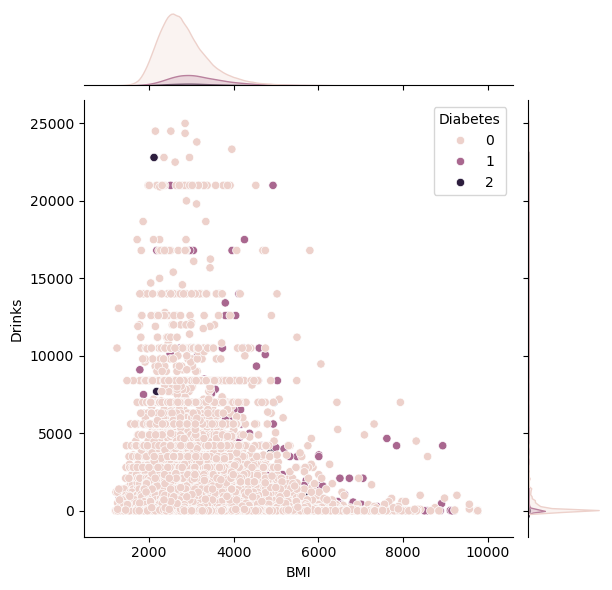

In [40]:
sns.jointplot(data=num, x="BMI", y="Drinks", hue='Diabetes',)

the dataset is super imbalance, to have a clear look, we will plot each diabetes class seperately:

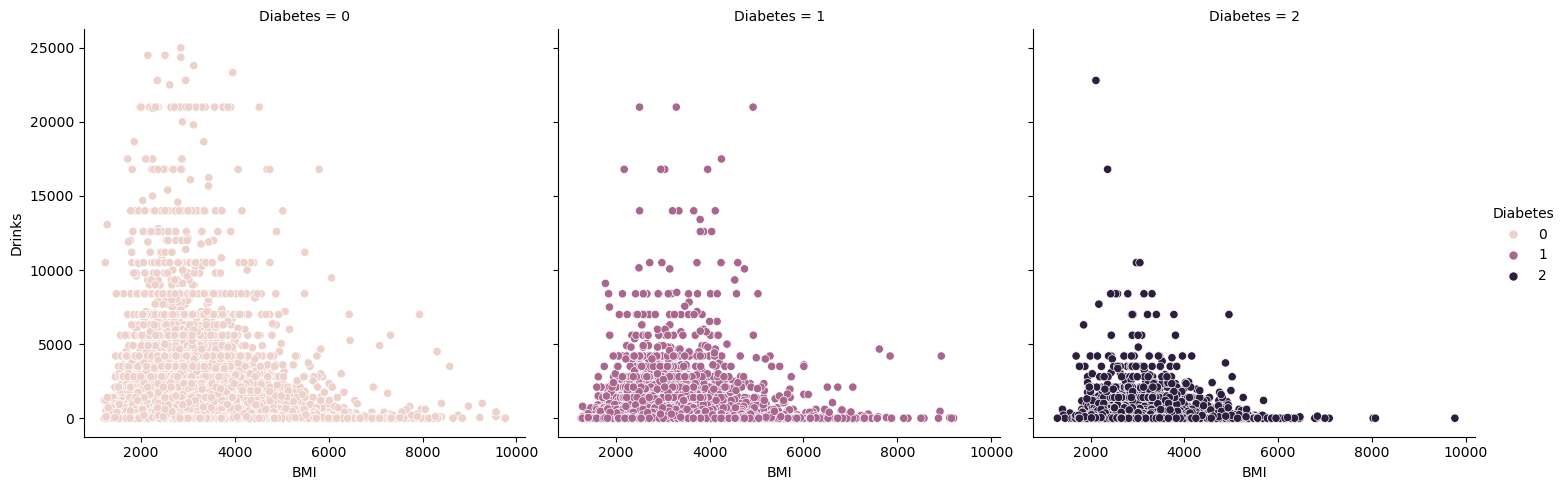

In [41]:
sns.relplot(
    data=num, y="Drinks", x="BMI",hue='Diabetes',
    col="Diabetes",
    kind="scatter"
)

the structures of these three classes look like the same among the BMI axis. And there are more people who are not diabetes (0) drink much more than those diabetes or prediabetes

Text(0.5, 1.0, 'Histplot for Drinks')

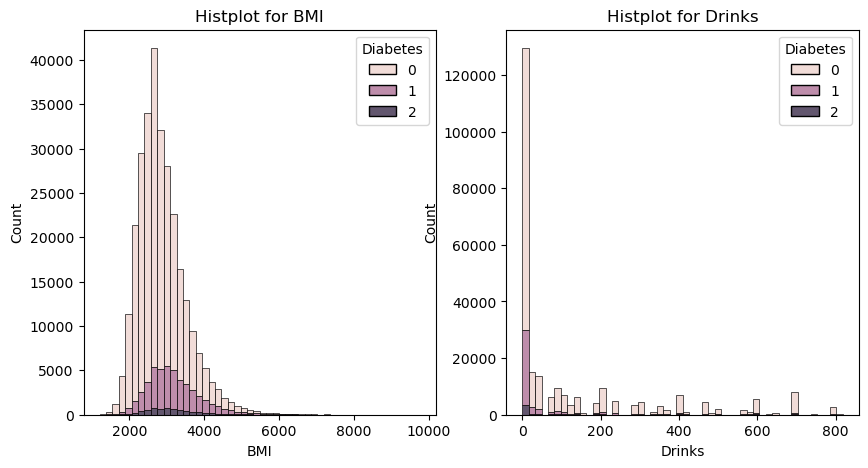

In [42]:
plt.figure(figsize=(10,5))
grid = plt.GridSpec(1,2)
plt.subplot(grid[0,0])
sns.histplot(num.loc[:,['BMI','Diabetes']],x='BMI',hue='Diabetes', multiple="stack", bins=50)
plt.title('Histplot for BMI')
plt.subplot(grid[0,1])
sns.histplot(num.loc[:,['Drinks','Diabetes']],x='Drinks',hue='Diabetes', multiple="stack", bins=50, binrange=(0,q3+1.5*iqr))
plt.title('Histplot for Drinks')

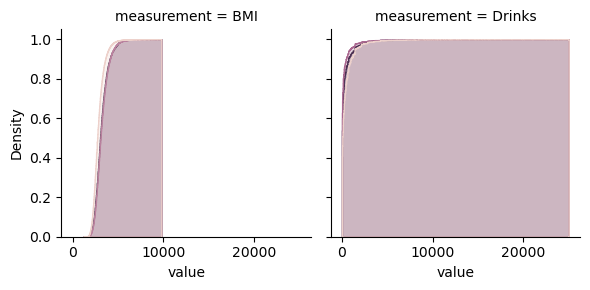

In [43]:
g=sns.FacetGrid(num_melt,col='measurement')#,row='measurement')
g.map_dataframe(
    sns.histplot, x="value", hue="Diabetes",
    hue_order=[2,1,0],
    log_scale=False, element="step", fill=True,
    cumulative=True, stat="density", common_norm=False
)

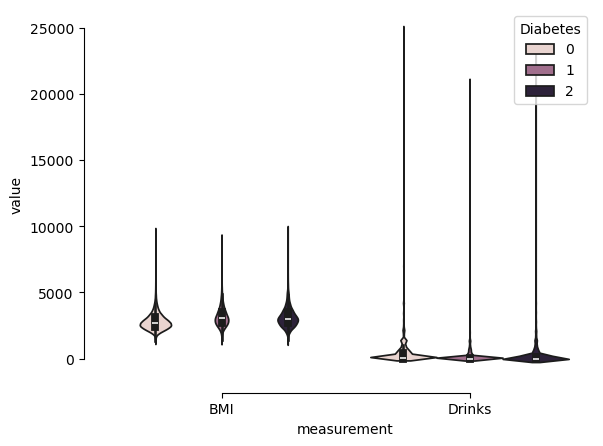

In [44]:
sns.violinplot(x="measurement", y="value", hue="Diabetes", data=num_melt)
sns.despine(offset=10, trim=True)

recheck the distribution by histplot, cumulative plots, and violin plots, it seems like there is no relationship between BMI and Diabetes, or Drinks and Diabetes. the majority of these classes are all gethering at the a low values of BMI or Drinks

In [45]:
cat_melt = cat.melt(id_vars="Diabetes", var_name="measurement")
cat_melt

,Diabetes,measurement,value
0,0,Gender,1
1,0,Gender,1
2,0,Gender,1
3,0,Gender,1
4,0,Gender,1
...,...,...,...
3494839,0,Arthritis,1
3494840,1,Arthritis,0
3494841,0,Arthritis,1
3494842,0,Arthritis,1


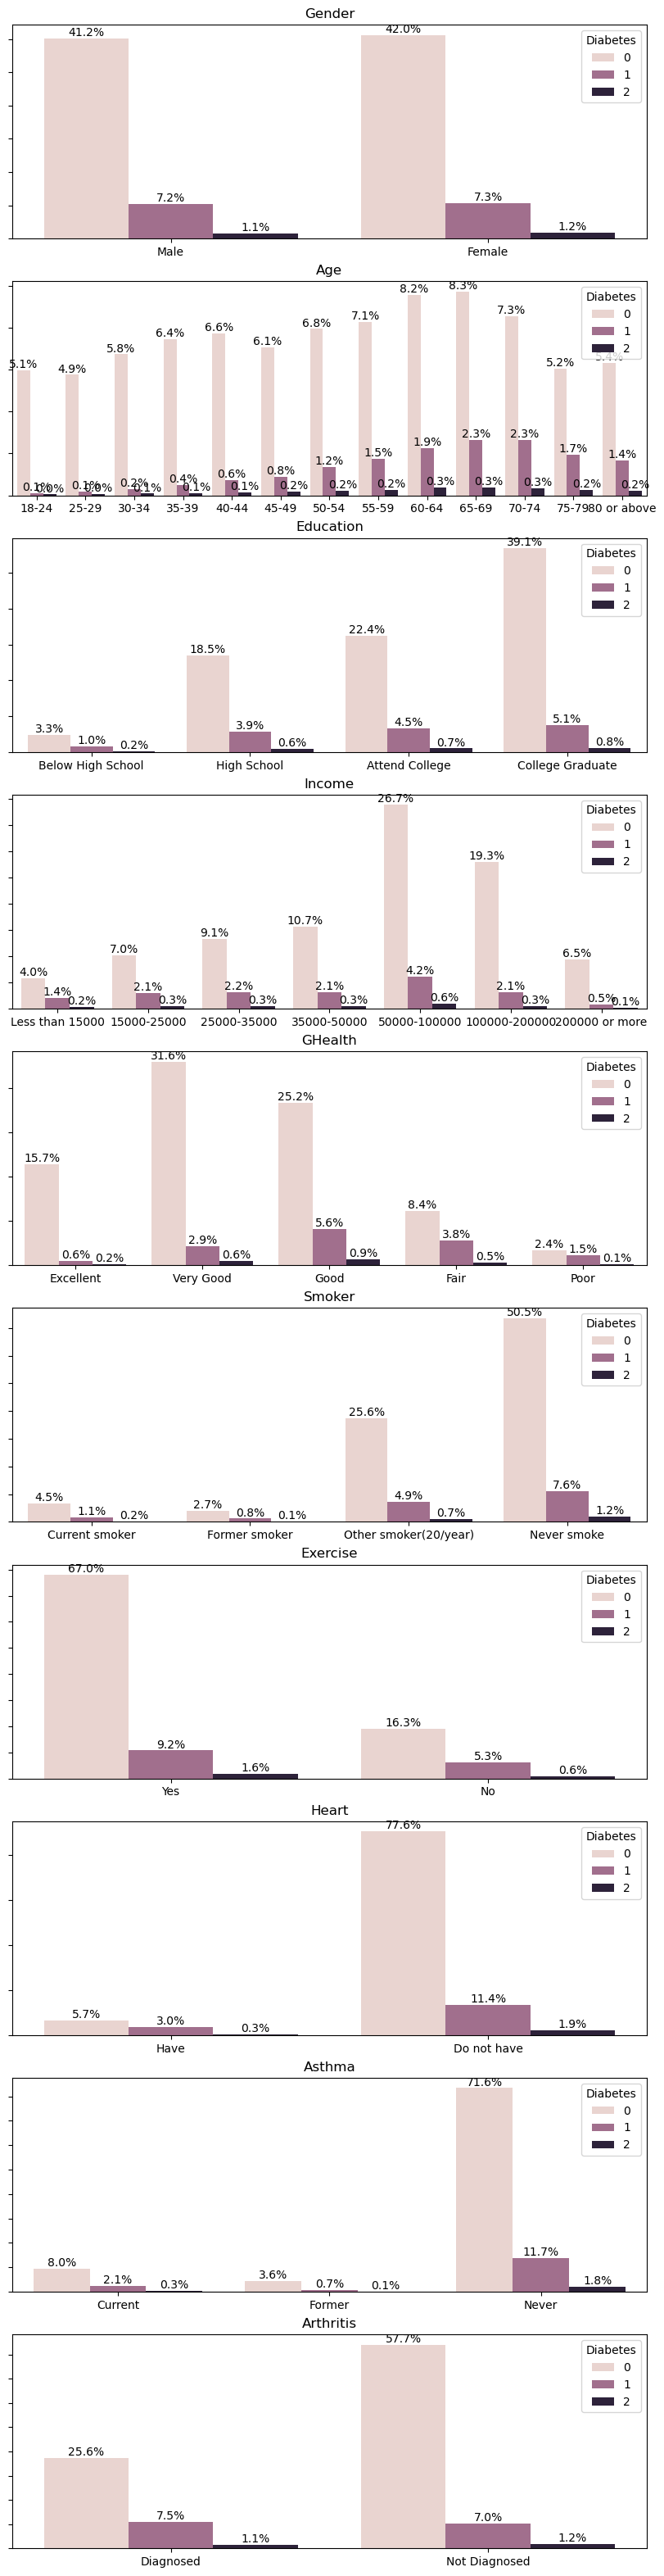

In [46]:
fig, axs = plt.subplots(10,figsize=(10, 40))
i=0
cols = ['Gender', 'Age', 'Education', 'Income', 'GHealth',
       'Smoker', 'Exercise','Heart', 'Asthma', 'Arthritis']
ticks = {'Gender':['Male','Female'],
         'Age':['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or above'],
         'Education':['Below High School','High School','Attend College','College Graduate'],
         'Income':['Less than 15000','15000-25000','25000-35000','35000-50000','50000-100000','100000-200000','200000 or more'],
         'GHealth':['Excellent','Very Good','Good','Fair','Poor'],
         'Smoker':['Current smoker','Former smoker','Other smoker(20/year)','Never smoke'],
         'Exercise':['Yes','No'],
         'Heart':['Have','Do not have'],
         'Asthma':['Current','Former','Never'],
         'Arthritis':['Diagnosed','Not Diagnosed']
        }
for h in cols:
    name = "ax{i}".format(i=i)
    name = sns.countplot(cat, x=h, hue="Diabetes", ax=axs[i])
    name.set(xlabel=None,xticklabels=ticks.get(h),ylabel=None,yticklabels=[],title=h)
    for j in name.containers:
        name.bar_label(j, fmt=lambda x: f'{(x/cat.shape[0])*100:0.1f}%')
    i=i+1

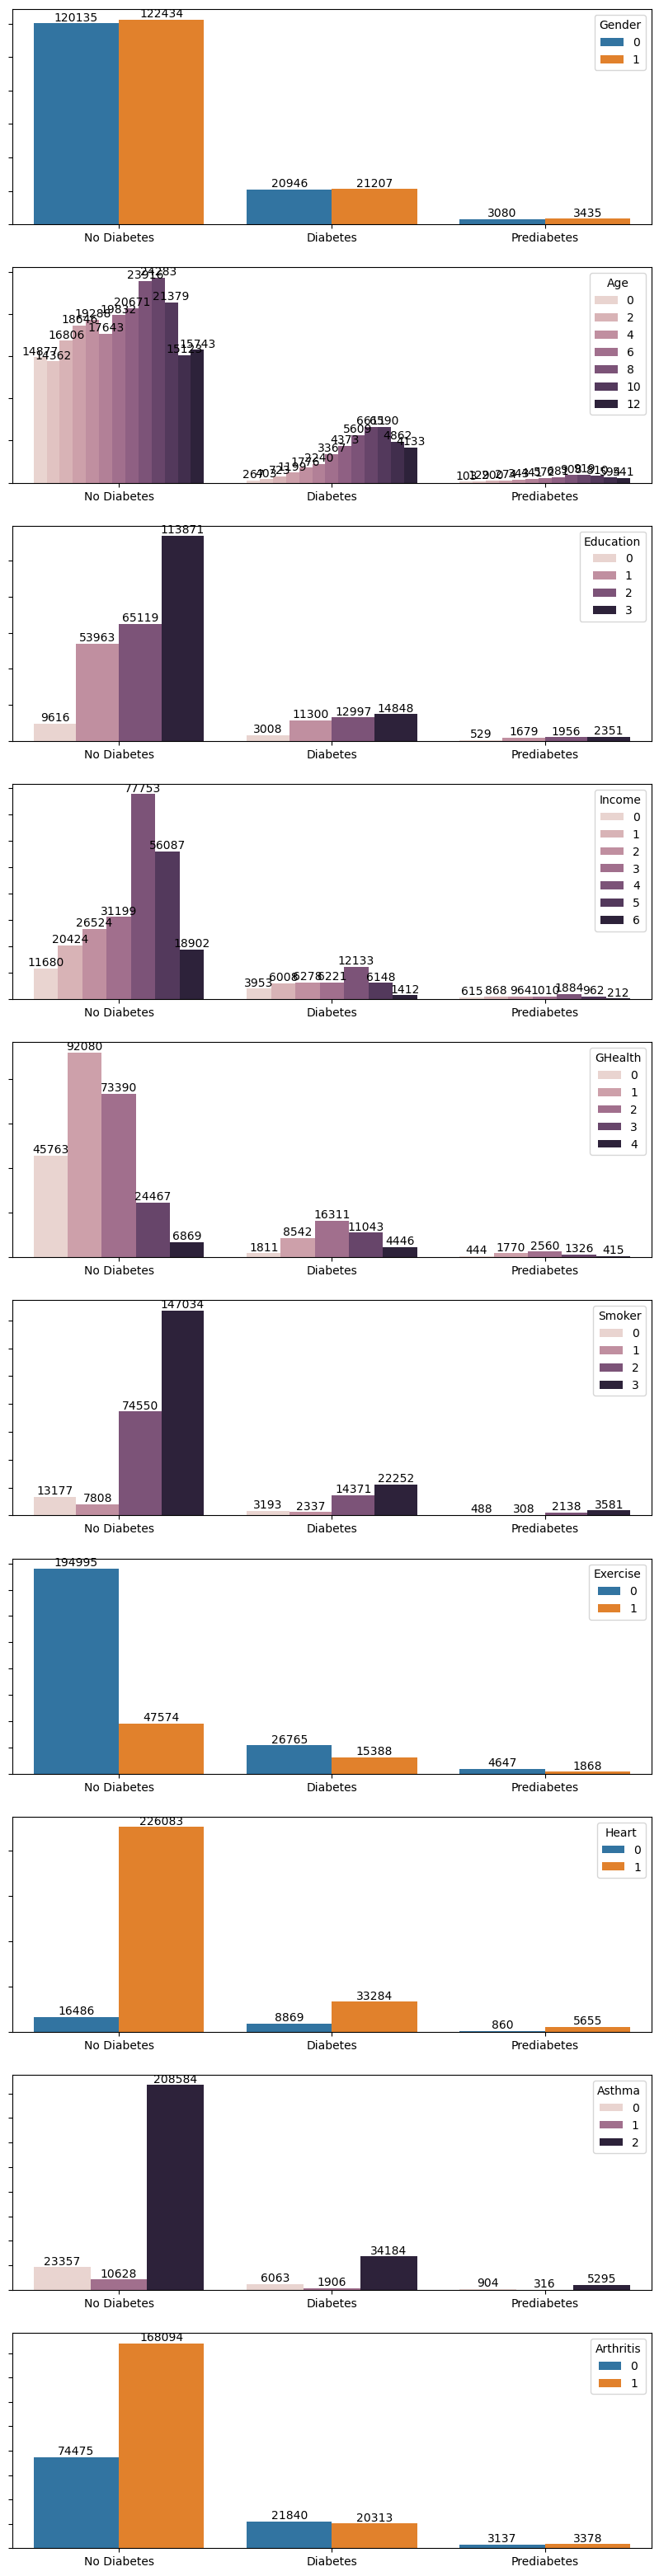

In [47]:
fig, axs = plt.subplots(10,figsize=(10, 40))
i=0
for h in cols:
    name = "ax{i}".format(i=i)
    name = sns.countplot(cat, hue=h, x="Diabetes", ax=axs[i])
    name.set(xlabel=None,xticklabels=['No Diabetes','Diabetes','Prediabetes'],ylabel=None,yticklabels=[])
    for j in name.containers:
        name.bar_label(j, fontsize=10)
    i=i+1

<Axes: >

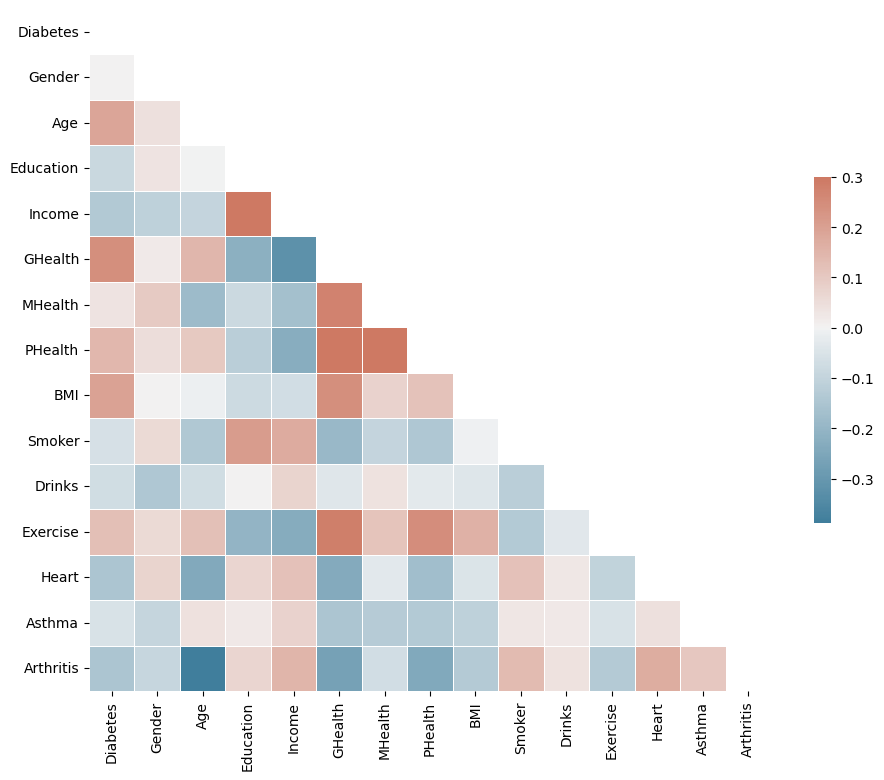

In [48]:
corr = selected.corr()

import numpy as np
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Normalization

**Train, Validation, Test Set Split**

In [49]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(selected.drop(labels=['Diabetes'], axis=1),
                                                    selected['Diabetes'],
                                                    test_size=0.3,
                                                    random_state=0
                                                   )
#Shape of training set and test set.
train_X.shape, test_X.shape
print('train: ', train_X.shape)
print('test: ', test_X.shape)

train:  (203865, 14)
test:  (87372, 14)


**MinMaxScaler**  
we use this instead of StandardScaler due to the reason that we are afraid of the absolute value of negative values will influence the results.

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(train_X)
train_X = pd.DataFrame(scaler.transform(train_X), columns = train_X.columns)
test_X = pd.DataFrame(scaler.transform(test_X),columns = test_X.columns)

In [51]:
train_X.sample(5)

,Gender,Age,Education,Income,GHealth,MHealth,PHealth,BMI,Smoker,Drinks,Exercise,Heart,Asthma,Arthritis
112485,1.0,0.416667,0.666667,0.666667,0.75,1.000000,0.500000,0.136565,0.000000,0.000000,1.0,1.0,1.0,1.0
198782,1.0,0.333333,1.000000,0.666667,0.50,1.000000,0.200000,0.252103,0.666667,0.001918,1.0,1.0,1.0,1.0
156344,1.0,1.000000,0.333333,0.333333,0.75,0.333333,0.166667,0.170327,1.000000,0.000000,0.0,1.0,1.0,0.0
26538,1.0,0.500000,1.000000,0.833333,0.25,0.000000,0.000000,0.201051,1.000000,0.003796,0.0,1.0,1.0,1.0
52021,0.0,0.416667,0.666667,0.666667,0.00,0.000000,0.000000,0.164252,1.000000,0.000000,0.0,1.0,1.0,1.0


# Feature Extraction & Selection

## PCA

In [52]:
from sklearn.decomposition import PCA

In [52]:
pcs = PCA(n_components= train_X.shape[1])
pcs.fit(train_X)
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(),
                                index=train_X.columns)

pc1 = pcsComponents_df[0].abs().sort_values(ascending=False)[:train_X.shape[1]]
pc2 = pcsComponents_df[1].abs().sort_values(ascending=False)[:train_X.shape[1]]
print('top {} features by PC1:'.format(train_X.shape[1]))
display(pc1)
print('top {} features by PC2:'.format(train_X.shape[1]))
display(pc2)

top 14 features by PC1:


Arthritis    0.647573
Gender       0.381617
Exercise     0.375106
PHealth      0.245800
GHealth      0.241497
Age          0.219975
Income       0.200779
Education    0.144273
Heart        0.139852
Asthma       0.126531
Smoker       0.122346
MHealth      0.121850
BMI          0.025344
Drinks       0.005657
Name: 0, dtype: float64

top 14 features by PC2:


Gender       0.908017
Arthritis    0.235796
Exercise     0.156216
Heart        0.154244
Smoker       0.126713
Education    0.124983
GHealth      0.124422
Age          0.105067
PHealth      0.101121
Income       0.039804
Asthma       0.036065
MHealth      0.013203
BMI          0.012903
Drinks       0.007970
Name: 1, dtype: float64

## Filter

In [53]:
# keep a original copy version
train_X_org = train_X.copy()
test_X_org = test_X.copy()

In [54]:
from sklearn.feature_selection import SelectKBest, chi2

In [55]:
skb = SelectKBest(chi2, k=train_X.shape[1])
skb = skb.fit(train_X, train_y)
skb.scores_

array([2.59982815e+00, 1.38267889e+03, 2.36251095e+02, 5.44255330e+02,
       2.62645034e+03, 1.33965291e+02, 2.93043456e+03, 2.66964893e+02,
       7.66764530e+01, 1.06279659e+02, 3.29867052e+03, 5.67740899e+02,
       6.87300355e+01, 1.84125435e+03])

In [56]:
skb.pvalues_

array([2.72555211e-001, 5.68976097e-301, 4.99719842e-052, 6.55324880e-119,
       0.00000000e+000, 8.12468655e-030, 0.00000000e+000, 1.06981864e-058,
       2.23830769e-017, 8.34959424e-024, 0.00000000e+000, 5.20751095e-124,
       1.18976839e-015, 0.00000000e+000])

In [57]:
idx = np.argsort(skb.scores_)[::-1]
idx

array([10,  6,  4, 13,  1, 11,  3,  7,  2,  5,  9,  8, 12,  0])

In [58]:
skb_ft = train_X.columns[idx]
skb_ft

Index(['Exercise', 'PHealth', 'GHealth', 'Arthritis', 'Age', 'Heart', 'Income',
       'BMI', 'Education', 'MHealth', 'Drinks', 'Smoker', 'Asthma', 'Gender'],
      dtype='object')

In [59]:
features_rank = pd.DataFrame([pc1.index, pc2.index, skb_ft], index=['PC1','PC2','SelectKBest'])
features_rank

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
PC1,Arthritis,Gender,Exercise,PHealth,GHealth,Age,Income,Education,Heart,Asthma,Smoker,MHealth,BMI,Drinks
PC2,Gender,Arthritis,Exercise,Heart,Smoker,Education,GHealth,Age,PHealth,Income,Asthma,MHealth,BMI,Drinks
SelectKBest,Exercise,PHealth,GHealth,Arthritis,Age,Heart,Income,BMI,Education,MHealth,Drinks,Smoker,Asthma,Gender


Depending on PCA and SelecKBest, we will delet 'BMI','Drinks','Asthma','Smoker','MHealth', and only keep 10 features, including the Diabetes

In [47]:
deleted = ['BMI','Drinks','Asthma','Smoker','MHealth']
keep = np.setdiff1d(selected.columns,deleted)
keep

array(['Age', 'Arthritis', 'Diabetes', 'Education', 'Exercise', 'GHealth',
       'Gender', 'Heart', 'Income', 'PHealth'], dtype=object)

In [48]:
len(keep)

10

In [54]:
selected[keep]

,Age,Arthritis,Diabetes,Education,Exercise,GHealth,Gender,Heart,Income,PHealth
0,12,1,0,1,1,0,1,1,2,0
1,7,1,0,3,0,1,1,1,5,2
2,4,1,0,2,0,3,1,1,2,2
3,12,1,0,3,0,1,1,1,4,0
4,12,0,0,1,1,2,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...
291262,1,1,0,3,0,3,1,1,1,0
291263,9,0,1,3,0,2,0,1,5,0
291264,2,1,0,3,0,2,0,1,4,0
291265,6,1,0,3,0,0,1,1,4,2


In [59]:
selected[keep].to_csv('non_normalized.csv')

# Store Training and Testing dataset to csv file

In [62]:
train_X, test_X, train_y, test_y = train_test_split(selected[keep].drop(columns=['Diabetes']),
                                                    selected['Diabetes'],
                                                    test_size=0.2,
                                                    random_state=0
                                                   )
#Shape of training set and test set.
print('train: ', train_X.shape)
print('test: ', test_X.shape)

train:  (232989, 9)
test:  (58248, 9)


In [63]:
train_X

,Age,Arthritis,Education,Exercise,GHealth,Gender,Heart,Income,PHealth
30364,12,1,3,0,2,1,1,4,0
30182,10,1,3,0,0,1,1,4,1
260168,8,0,2,1,3,1,1,2,17
4686,0,1,2,0,1,1,1,3,0
61494,9,1,2,0,0,0,1,5,0
...,...,...,...,...,...,...,...,...,...
211562,9,1,3,0,2,0,1,4,0
86302,10,1,3,0,0,1,1,5,0
122592,4,1,2,0,0,1,1,4,0
152330,6,0,3,0,3,0,1,6,0


In [64]:
train_y

30364     0
30182     0
260168    0
4686      0
61494     0
         ..
211562    1
86302     0
122592    0
152330    0
117965    0
Name: Diabetes, Length: 232989, dtype: int64

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(train_X)
train_X = pd.DataFrame(scaler.transform(train_X), columns = train_X.columns)
test_X = pd.DataFrame(scaler.transform(test_X),columns = test_X.columns)

In [66]:
train_X.sample(5)

,Age,Arthritis,Education,Exercise,GHealth,Gender,Heart,Income,PHealth
91403,0.166667,1.0,0.333333,0.0,0.25,0.0,1.0,0.833333,0.333333
65881,0.250000,1.0,0.333333,0.0,0.50,0.0,1.0,0.666667,0.000000
154238,0.000000,1.0,1.000000,0.0,0.25,1.0,1.0,0.833333,0.000000
49501,0.666667,1.0,1.000000,0.0,0.50,0.0,1.0,0.833333,0.333333
134490,0.333333,1.0,1.000000,0.0,0.00,0.0,1.0,1.000000,0.000000


In [67]:
pd.concat([train_X, pd.DataFrame(train_y).reset_index(drop=True)], axis=1).to_csv('training.csv')
pd.concat([test_X, pd.DataFrame(test_y).reset_index(drop=True)], axis=1).to_csv('testing.csv')

In [68]:
pd.concat([pd.read_csv('training.csv', index_col=0),
           pd.read_csv('testing.csv', index_col=0)]
          ,axis=0
         ).sample(frac=1).reset_index(drop=True).to_csv('cleaned_all.csv')

## non_normalized
we also want to test whether decision tree model is normalized data or not

In [60]:
df = pd.read_csv('non_normalized.csv',index_col=0)
df

,Age,Arthritis,Diabetes,Education,Exercise,GHealth,Gender,Heart,Income,PHealth
0,12,1,0,1,1,0,1,1,2,0
1,7,1,0,3,0,1,1,1,5,2
2,4,1,0,2,0,3,1,1,2,2
3,12,1,0,3,0,1,1,1,4,0
4,12,0,0,1,1,2,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...
291262,1,1,0,3,0,3,1,1,1,0
291263,9,0,1,3,0,2,0,1,5,0
291264,2,1,0,3,0,2,0,1,4,0
291265,6,1,0,3,0,0,1,1,4,2


In [61]:

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(df.drop(columns=['Diabetes']),
                                                    df['Diabetes'],
                                                    test_size=0.2,
                                                    random_state=0
                                                   )
#Shape of training set and test set.
print('train: ', train_X.shape)
print('test: ', test_X.shape)

train:  (232989, 9)
test:  (58248, 9)


In [62]:
pd.concat([train_X,train_y],axis=1).to_csv('non_normalized_train.csv')
pd.concat([test_X,test_y],axis=1).to_csv('non_normalized_test.csv')

# Load local Training and Testing data 

First read the stored training and testing data.

In [90]:
X_train = pd.read_csv('training.csv',index_col=0)
X_test = pd.read_csv('testing.csv', index_col=0)

y_train = X_train.pop('Diabetes')
y_test = X_test.pop('Diabetes')

In [3]:
X_train.shape, y_train.shape

((232989, 9), (232989,))

In [4]:
X_test.shape, y_test.shape

((58248, 9), (58248,))

In [5]:
X_train.head()

,Age,Arthritis,Education,Exercise,GHealth,Gender,Heart,Income,PHealth
0,1.000000,1.0,1.000000,0.0,0.50,1.0,1.0,0.666667,0.000000
1,0.833333,1.0,1.000000,0.0,0.00,1.0,1.0,0.666667,0.033333
2,0.666667,0.0,0.666667,1.0,0.75,1.0,1.0,0.333333,0.566667
3,0.000000,1.0,0.666667,0.0,0.25,1.0,1.0,0.500000,0.000000
4,0.750000,1.0,0.666667,0.0,0.00,0.0,1.0,0.833333,0.000000


# Naive Beyes

## Introduction  
read it in document

## Implementation

Since our data is complex and contain different type of attributes, we want to test for all three NB models.

In [6]:
gaus = GaussianNB()
bi = BernoulliNB()
multi = MultinomialNB()

## Cross validation

We build a function for cross validation score on each model.

In [7]:
def crossv(model,x,y):
    model.fit(x,y)
    cv = StratifiedKFold(10, shuffle=True, random_state=0)
    cv_avg = cross_val_score(model, x, y, cv=cv).mean()
    
    return cv_avg

In [8]:
pd.DataFrame({'Gaussian Naive Bayes':crossv(gaus,X_train,y_train),
              'Bernoulli Naive Bayes':crossv(bi,X_train,y_train),
              'Multinomial Naive Bayes':crossv(multi,X_train,y_train)},
            index=['Average cross validation score']).T

,Average cross validation score
Gaussian Naive Bayes,0.776556
Bernoulli Naive Bayes,0.821786
Multinomial Naive Bayes,0.832876


From the CV result we can see that Bernoulli and Multinomial NB model have a better performance so we will continue to hyperparameter turning on these two model.

## Hyperparameter

The function we build is use to perform grid search on the model to produce best parameters.

In [9]:
def hyperparameter(model,x,y,param):
    kflod = StratifiedKFold(n_splits=10, shuffle = True,random_state=7)
    grid_search = GridSearchCV(model,param,scoring = 'accuracy',n_jobs = -1,cv = kflod)
    grid_result = grid_search.fit(x,y)
    print("Best accuracy of %s: %f using %s" % (model,grid_result.best_score_,grid_search.best_params_))

In [10]:
alphas = [1,1e-10,0.01,0.1,10,100]
param = dict(alpha=alphas)
hyperparameter(multi,X_train,y_train,param)
hyperparameter(bi,X_train,y_train,param)

Best accuracy of MultinomialNB(): 0.832868 using {'alpha': 100}
Best accuracy of BernoulliNB(): 0.821811 using {'alpha': 1}


After finding the best parameter we find out that multinomial NB model is the one perform the best among the three so we going to use that one.

## Train and test the model

In [11]:
bestNB = MultinomialNB(alpha=100)
bestNB.fit(X_train, y_train)
y_pred = bestNB.predict(X_test)

In [12]:
accuray = accuracy_score(y_pred, y_test)
precision = precision_score(y_pred, y_test, average='weighted')
recall = recall_score(y_pred, y_test, average='weighted')
f1 = f1_score(y_pred, y_test, average="weighted")
score = pd.DataFrame({"Accuracy":accuray,
              "Precision":precision,
              "Recall":recall,
              "F1 Score":f1},
            index=['Multinomial NB'])
score

,Accuracy,Precision,Recall,F1 Score
Multinomial NB,0.832956,0.995417,0.832956,0.90611


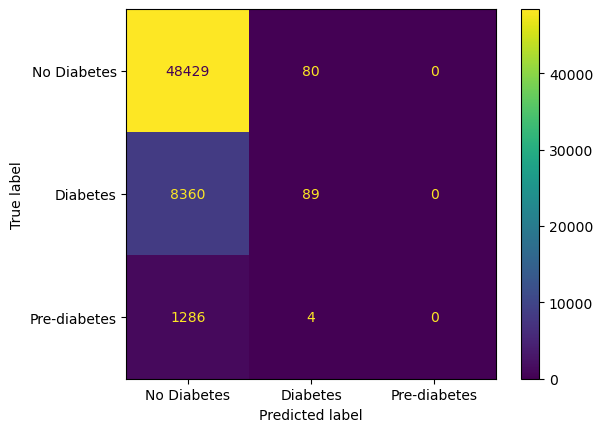

In [13]:
labels = ["No Diabetes", "Diabetes", "Pre-diabetes"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

From the score table the model seems work find but when we look at the confusion matrix we can find out that almost all the record have been classified as No diabetes which is not good.

## NB Model reselect

We find out that the reason is our dataset is extremely inbanlanced so we change to another NB model which is good at dealing imbanlanced data.

In [14]:
com = ComplementNB()

In [15]:
norms = [True,False]
param = dict(alpha=alphas,norm=norms)
hyperparameter(com,X_train,y_train,param)

Best accuracy of ComplementNB(): 0.784840 using {'alpha': 100, 'norm': True}


In [19]:
bestCom = ComplementNB(alpha=100,norm=True)
bestCom.fit(X_train, y_train)
y_pred_NB = bestCom.predict(X_test)

In [21]:
accuray = accuracy_score(y_pred_NB, y_test)
precision = precision_score(y_pred_NB, y_test, average='weighted')
recall = recall_score(y_pred_NB, y_test, average='weighted')
f1 = f1_score(y_pred_NB, y_test, average="weighted")
scoreC = pd.DataFrame({"Accuracy":accuray,
              "Precision":precision,
              "Recall":recall,
              "F1 Score":f1},
            index=['Complement NB'])
NB_performance = pd.concat([score, scoreC])
NB_performance

,Accuracy,Precision,Recall,F1 Score
Multinomial NB,0.832956,0.995417,0.832956,0.906110
Complement NB,0.782533,0.796224,0.782533,0.789132


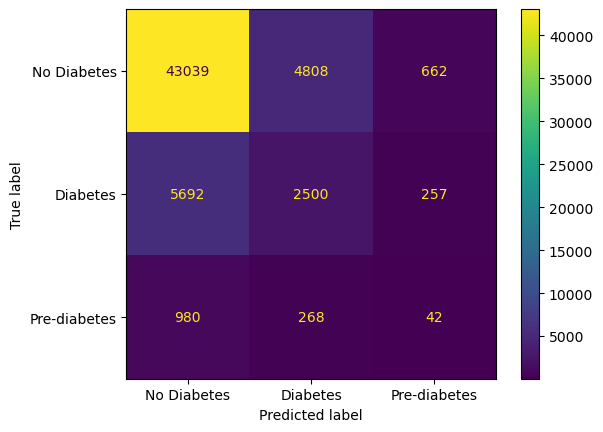

In [45]:
labels = ["No Diabetes", "Diabetes", "Pre-diabetes"]
cm_NB = confusion_matrix(y_test, y_pred_NB)
disp_NB = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp_NB.plot();

By looking at the scores only we may think that the complement model is not that good. however, when we look at confusion matirx we can find out that it can deal with the minor class much better, thus we think it is the better model to use.

In [24]:
report_NB = classification_report(y_test, y_pred_NB)
print(report_NB)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     48509
           1       0.33      0.30      0.31      8449
           2       0.04      0.03      0.04      1290

    accuracy                           0.78     58248
   macro avg       0.41      0.41      0.41     58248
weighted avg       0.77      0.78      0.78     58248



# Decision Tree

## Introduction 
read in document

## Implementation  
let's build a default Decision Tree first, the parameters below are what we want to adjust later to get the best performing model.  

The default model performs already good on training set, the mean accuracy (DT.score()) almost reaches to 90%; but a little worse on testing and validation set, the accuracy decreases aroung 10% on testing and validation set comparing to on training set. so it seems like the defaul model is overfitting. we want to adjust the parameters and increase the performance on testing dataset

In [65]:
DT = DecisionTreeClassifier(#criterion='gini' or 'entropy',
                            #max_depth=None, 
                            #min_samples_split=2,
                            #min_samples_leaf=1,
                            #random_state=None，
                           ).fit(X_train, y_train)

In [66]:
print('Training set score: {:.4f}'.format(DT.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(DT.score(X_test, y_test)))

Training set score: 0.8849
Test set score: 0.8055


## Cross-validation and hyperparameter tuning

first we will keep other parameters as default value, and only look at one once and find its best value accordingg to cross validation score. 

the cross_val_score function on the estimator and the dataset is the simplest way to use cross-validation.

### 1. criterion

first let's have a look at the difference among using entropy, gini (the default one) and log_loss as criterion. criterion is a function to measure the quality of a split during training and the model will choose the best split base on this quality.

the scores show that we should use entropy as our criterion

In [67]:
DT = DecisionTreeClassifier(random_state = 1)
score = cross_val_score(DT,X_train,y_train,cv=10).mean()
print('gini index: %.4f'%score)

DT = DecisionTreeClassifier(criterion = 'entropy',random_state = 1)
score = cross_val_score(DT,X_train,y_train,cv=10).mean()
print('entropy: %.4f'%score)

DT = DecisionTreeClassifier(criterion = 'log_loss',random_state = 1)
score = cross_val_score(DT,X_train,y_train,cv=10).mean()
print('log_loss: %.4f'%score)

gini index: 0.8052
entropy: 0.8054
log_loss: 0.8054


### 2. max_depth

In [91]:
def find_best_max_depth(a, b, step):
    all_scores = []
    for i in range(a, b, step):
        DT = DecisionTreeClassifier(criterion = 'entropy', 
                                    max_depth = i,
                                    random_state = 1
                                   )
        score = cross_val_score(DT, X_train, y_train, cv=10).mean()
        all_scores.append([i,score])
    all_scores = np.array(all_scores)
    
    max_score = np.where(all_scores==np.max(all_scores[:,1]))[0][0]
    print("the best max_depth and its score:",all_scores[max_score])  
    #print(all_scores[:,0])
    plt.figure(figsize=[20,5])
    plt.plot(all_scores[:,0],all_scores[:,1])
    plt.show()
    return int(all_scores[max_score][0])

Search a estimated parameter range of max_depth in a wide range, draw a curve of the score changing with this parameter and observe the relationship between the two.

#### 10 - 100

the best max_depth and its score: [10.          0.83219808]
[10. 20. 30. 40. 50. 60. 70. 80. 90.]


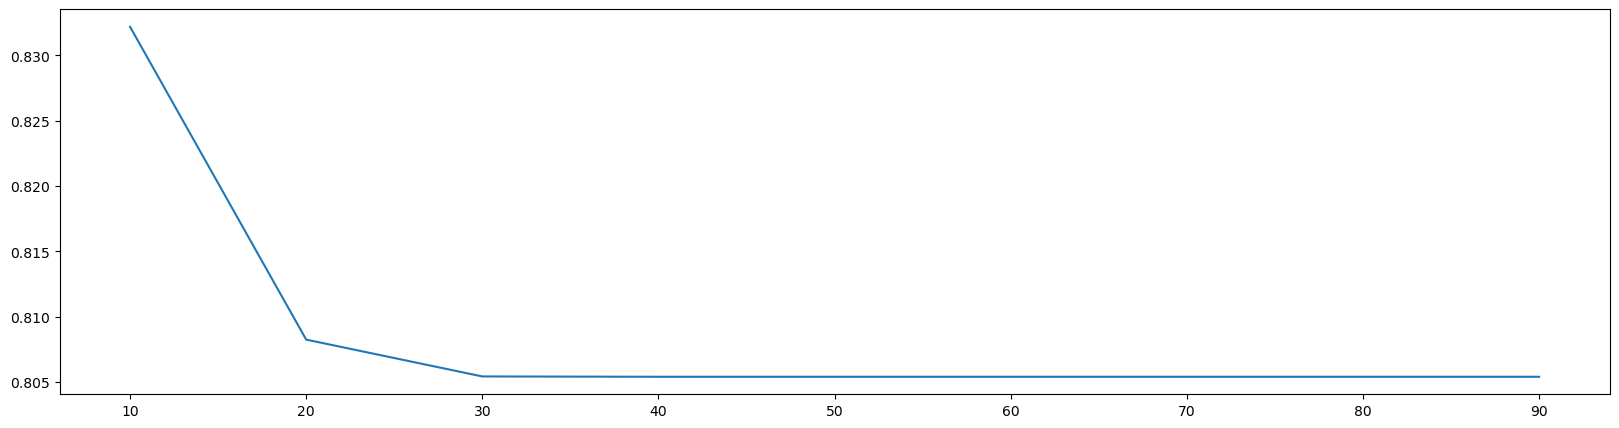

In [69]:
max_depth = find_best_max_depth(10, 100, 10)

we could see that while increase the max_depth, the performance decrease, so we could further narrow the range of the max_depth parameter arong 10, and take the step of 1. And we get the best max_depth of 7.

#### aroung 10

the best max_depth and its score: [7.         0.83348999]


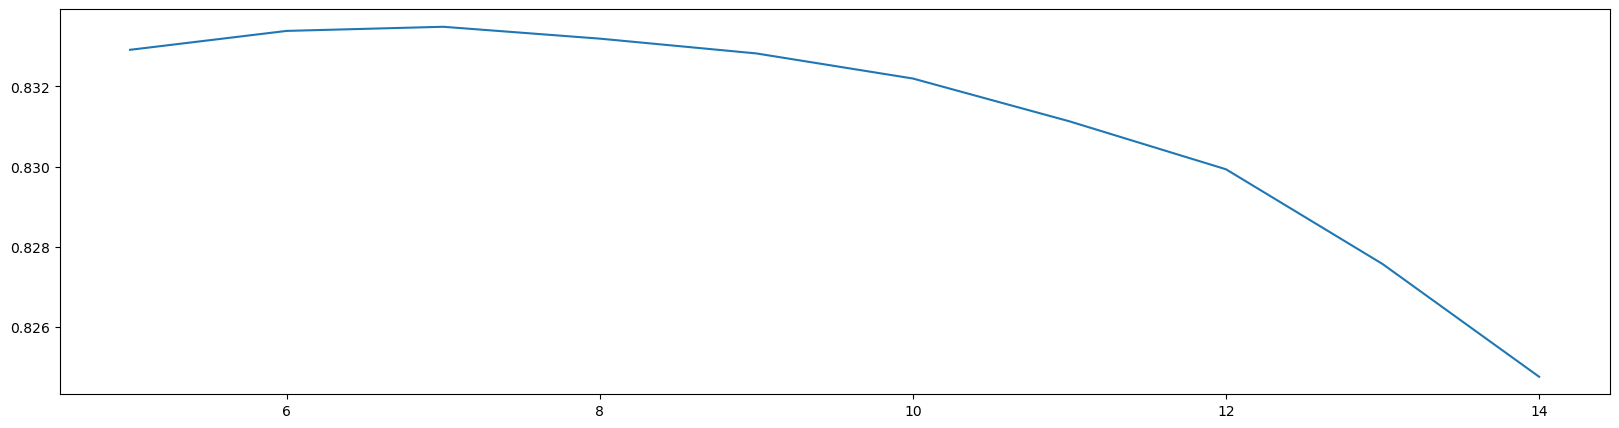

In [92]:
max_depth = find_best_max_depth(5,15,1)

In [71]:
max_depth

7

### 3. min_samples_split

In [95]:
def find_best_min_samples_split(a,b,step):
    all_scores = []
    for i in range(a, b, step):
        DT = DecisionTreeClassifier(criterion = 'entropy',
                                    max_depth = max_depth,
                                    min_samples_split = i,
                                    random_state = 1
                                   )
        score = cross_val_score(DT,X_train,y_train,cv=10).mean()
        all_scores.append([i,score])
    all_scores = np.array(all_scores)
    
    max_score = np.where(all_scores==np.max(all_scores[:,1]))[0][0] 
    print("the best min_samples_split and its score: ",all_scores[max_score])  
    #print(all_scores)
    plt.figure(figsize=[20,5])
    plt.plot(all_scores[:,0],all_scores[:,1])
    plt.show()
    return int(all_scores[max_score][0])

Use the above max_depth to draw a curve and observe how the score changes with min_samples_split (the minimum number of samples required to split internal nodes) to determine the its best value, which is 10 here.

the best min_samples_split and its score:  [10.          0.83349428]


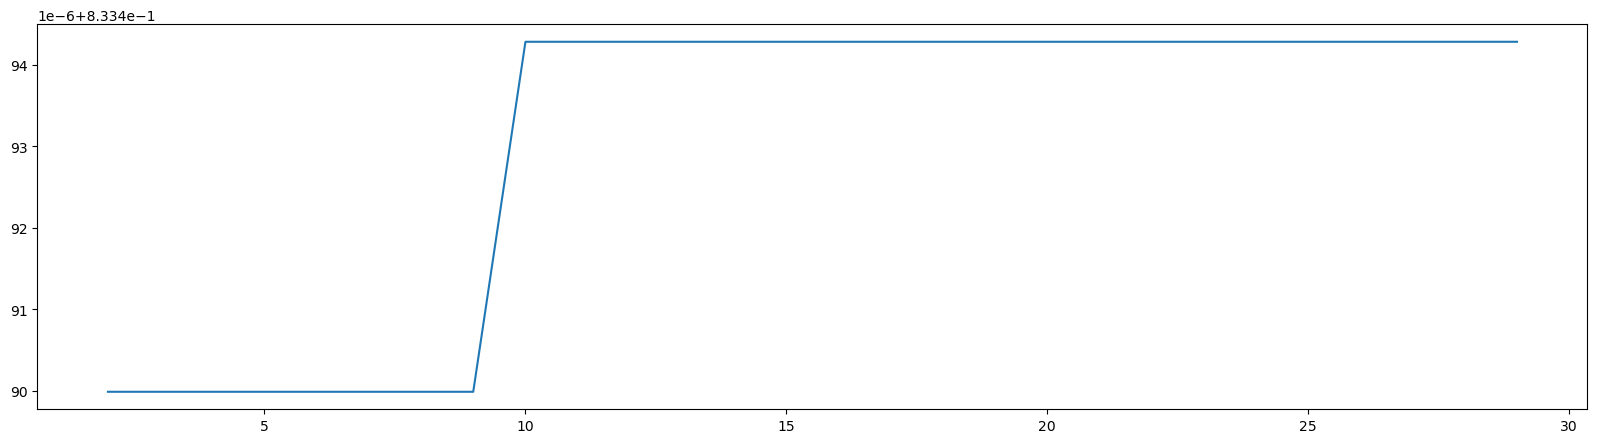

In [96]:
min_samples_split =find_best_min_samples_split(2, 30, 1)

### 4. min_samples_leaf

In [97]:
def find_best_min_samples_leaf(a,b,step):
    all_scores = []
    for i in range(a, b, step):
        DT = DecisionTreeClassifier(criterion = 'entropy',
                                    max_depth = max_depth,
                                    min_samples_split = min_samples_split,
                                    min_samples_leaf = i,
                                    random_state = 1)
        score = cross_val_score(DT,X_train,y_train,cv=10).mean()
        all_scores.append([i,score])
    all_scores = np.array(all_scores)
    
    max_score = np.where(all_scores==np.max(all_scores[:,1]))[0][0] 
    print("the best min_samples_leaf and its score: ",all_scores[max_score])  
    plt.figure(figsize=[20,5])
    plt.plot(all_scores[:,0],all_scores[:,1])
    plt.show()
    return int(all_scores[max_score][0])

Similar to the above steps, use the best max_depth and the best min_samples_split that got in the above parts, draw the score changing plot of various min_samples_leaf values. then we got the value of 12

the best min_samples_leaf and its score:  [12.          0.83352433]


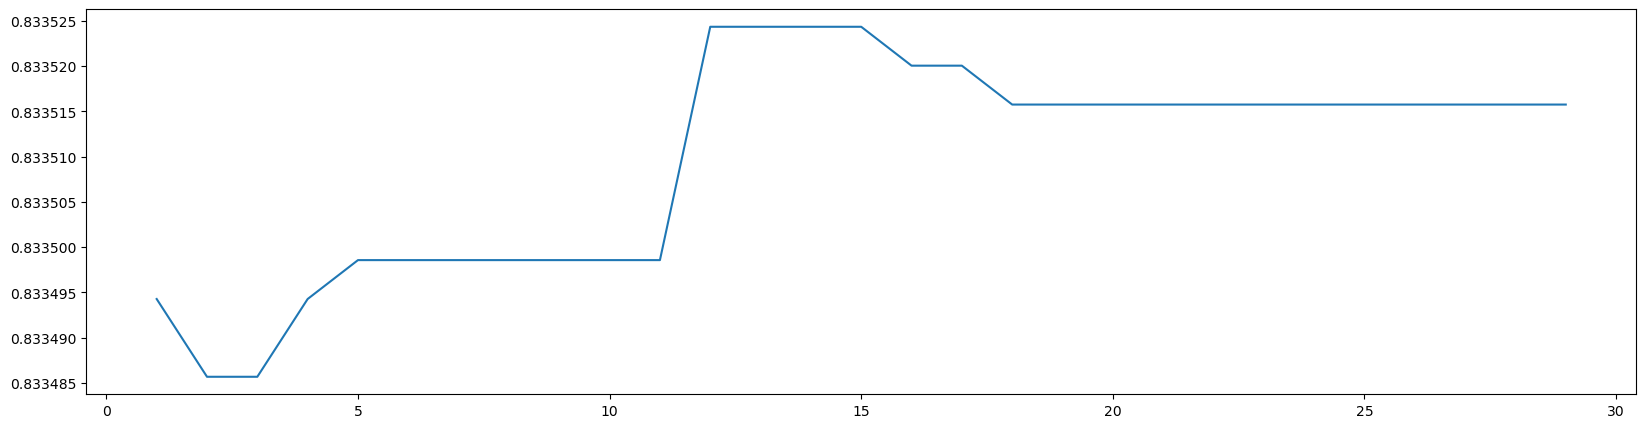

In [98]:
min_samples_leaf = find_best_min_samples_leaf(1,30,1)

Now we got four temporal parameter values, including criterion of entropy, let's check the model performance with them, before a grid search

In [76]:
max_depth

7

In [77]:
min_samples_split

10

In [78]:
min_samples_leaf

12

In [83]:
DT = DecisionTreeClassifier(criterion='entropy', 
                            max_depth=max_depth, 
                            min_samples_leaf = min_samples_leaf,
                            min_samples_split = min_samples_split,
                            random_state=0
                           ).fit(X_train, y_train)

In [85]:
print('Training set score: {:.6f}'.format(DT.score(X_train, y_train)))
print('Test set score: {:.6f}'.format(DT.score(X_test, y_test)))

Training set score: 0.833567
Test set score: 0.832750


### 5. grid search

In [79]:
param_grid = {
    'max_depth':np.arange(5,8),
    'min_samples_split':np.arange(9,12),
    'min_samples_leaf':np.arange(10, 14)}

DT = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
GS = GridSearchCV(DT,param_grid,cv=36)
GS.fit(X_train,y_train)
print(GS.best_params_)
print(GS.best_score_)

{'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 9}
0.8335672386532789


In [116]:
DT = DecisionTreeClassifier(criterion='entropy', 
                            max_depth=GS.best_params_['max_depth'], 
                            min_samples_leaf = GS.best_params_['min_samples_leaf'],
                            min_samples_split = GS.best_params_['min_samples_split'],
                            random_state=0
                           ).fit(X_train, y_train)

In [117]:
print('Training set score: {:.6f}'.format(DT.score(X_train, y_train)))
print('Test set score: {:.6f}'.format(DT.score(X_test, y_test)))

Training set score: 0.833567
Test set score: 0.832750


We ccould see that although grid search gave us a new set of best parameters, the scores are not changed. 

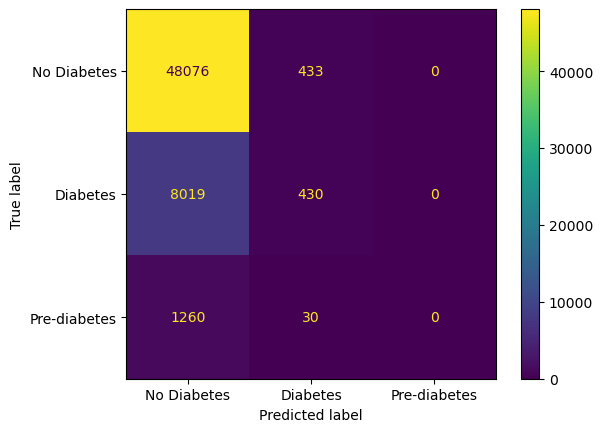

In [118]:
y_pred = DT.predict(X_test)
labels = ["No Diabetes", "Diabetes", "Pre-diabetes"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

## performance on non norlization dataset

One of advantages using DT is it doesn't need too much data preparation, so let's check this by building models with same parameters, but training on the original non-normalized dataset. The final scores are also as same as the previous, without surprice.

In [105]:
X_train = pd.read_csv('non_normalized_train.csv', index_col=0)
y_train = X_train.pop('Diabetes')
X_test = pd.read_csv('non_normalized_test.csv', index_col=0)
y_test = X_test.pop('Diabetes')

In [106]:
DT = DecisionTreeClassifier(criterion='entropy', 
                            max_depth=GS.best_params_['max_depth'], 
                            min_samples_leaf = GS.best_params_['min_samples_leaf'],
                            min_samples_split = GS.best_params_['min_samples_split'],
                            random_state=0
                           ).fit(X_train, y_train)

In [107]:
print('Training set score: {:.6f}'.format(DT.score(X_train, y_train)))
print('Test set score: {:.6f}'.format(DT.score(X_test, y_test)))

Training set score: 0.833567
Test set score: 0.832750


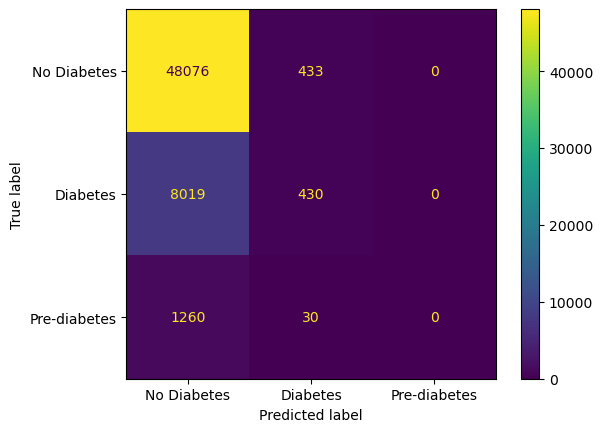

In [111]:
y_pred = DT.predict(X_test)
labels = ["No Diabetes", "Diabetes", "Pre-diabetes"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

## adjust Decision Tree class_weight  
although accuracy is already high, we found that the ability of predict true positive records is weak, which should blame imbalancement. So we want to adjust another parameter of DT, class_weight.

In [8]:
y_train.value_counts()

Diabetes
0    194060
1     33704
2      5225
Name: count, dtype: int64

In [9]:
y_test.value_counts()

Diabetes
0    48509
1     8449
2     1290
Name: count, dtype: int64

In [38]:
(y_train.value_counts()[0]+y_test.value_counts()[0])/(len(y_train)+len(y_test))

0.8328921119225923

In [39]:
(y_train.value_counts()[1]+y_test.value_counts()[1])/(len(y_train)+len(y_test))

0.1447377908713522

In [40]:
(y_train.value_counts()[2]+y_test.value_counts()[2])/(len(y_train)+len(y_test))

0.02237009720605555

define a function that could calculate the accuracy of a specific class label, if it is -1, then calculate the overall accuracy

In [30]:
def class_accuracy(label, y, y_pred):
    acc = 0
    if label==-1:
        idx = y.index
    else:
        idx = y[y==label].index
    length = len(idx)
    for i in idx:
        if y[i] == y_pred[i]:
            acc+=1
    return acc/length

a function that apply cross-validation to each weight and calculate the class 1 (diabetes) accuracy, coz we care most of the performance of predicting diabetes, then plot the line of class 1 and overall accuracy vs weight

In [77]:
def find_best_class_weight():
    all_scores = []
    for i in range(0,11):
        weight = i/10
        #class0_acc = []
        class1_acc = []
        #class2_acc = []
        acc = []
        for j in range(10): #cross validation
            X_trn, X_val, y_trn, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=j)
            DT = DecisionTreeClassifier(criterion = 'entropy',
                                        max_depth=6, 
                                        min_samples_leaf = 10,
                                        min_samples_split = 9,
                                        class_weight = {0:weight},
                                        random_state = 1).fit(X_trn, y_trn)
            y_val_pred = DT.predict(X_val)
            y_val = y_val.reset_index(drop=True)
            #class0_acc.append(class_accuracy(0,y_val, y_val_pred))
            class1_acc.append(class_accuracy(1,y_val, y_val_pred))
            #class2_acc.append(class_accuracy(2,y_val, y_val_pred))
            acc.append(class_accuracy(-1, y_val, y_val_pred)) # total
        #class0_score = np.mean(class0_acc)
        class1_score = np.mean(class1_acc)
        #class2_score = np.mean(class2_acc)
        score = np.mean(acc)
        all_scores.append([weight,class1_score, score])
    all_scores = np.array(all_scores)
    
    #max_score = np.where(all_scores==np.max(all_scores[:,1]))[0][0] 
    #print("the best min_samples_split and its score: ",all_scores[max_score])  
    plt.figure(figsize=[20,5])
    plt.plot(all_scores[:,0],all_scores[:,1])
    plt.plot(all_scores[:,0],all_scores[:,2])
    plt.text(0.8, 0.2, "class 1 accuracy")
    plt.text(0.8, 0.7, "overall accuracy")

    plt.show()
    #return pd.DataFrame(all_scores, columns=['class 0 accuracy','class 1 accuracy','class 2 accuracy'])

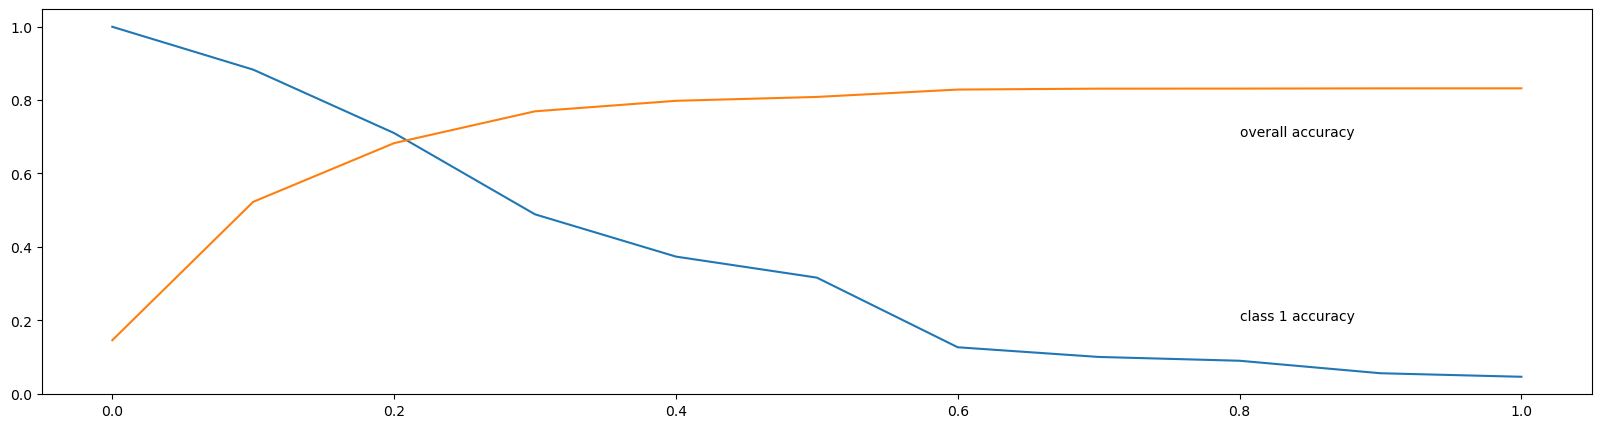

In [78]:
find_best_class_weight()

so we decide to choose weight of 0.2 to balance the two scores

## Final DT Model & Evaluation

In [105]:
DT = DecisionTreeClassifier(criterion='entropy', 
                            max_depth=6, 
                            min_samples_leaf = 10,
                            min_samples_split = 9,
                            class_weight = {0:0.2},
                            random_state=0
                           ).fit(X_train, y_train)

In [101]:
print('Training set score: {:.6f}'.format(DT.score(X_train, y_train)))
print('Test set score: {:.6f}'.format(DT.score(X_test, y_test)))

Training set score: 0.678826
Test set score: 0.675749


In [102]:
print('Training set score for class 1: {:.6f}'.format(class_accuracy(1,y_train, DT.predict(X_train))))
print('Test set score for class 1: {:.6f}'.format(class_accuracy(1,y_test, DT.predict(X_test))))

Training set score for class 1: 0.720389
Test set score for class 1: 0.715233


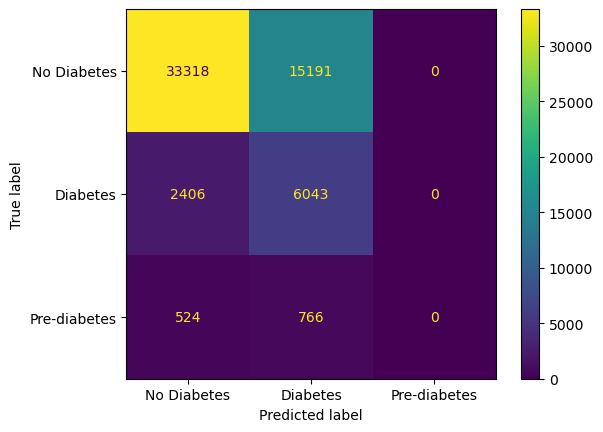

In [110]:
y_pred_DT = DT.predict(X_test)
labels = ["No Diabetes", "Diabetes", "Pre-diabetes"]
cm_DT = confusion_matrix(y_test, y_pred_DT)
disp_DT = ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=labels)
disp_DT.plot();

In [107]:
report_DT = classification_report(y_test, y_pred_DT)
print(report_DT)

              precision    recall  f1-score   support

           0       0.92      0.69      0.79     48509
           1       0.27      0.72      0.40      8449
           2       0.00      0.00      0.00      1290

    accuracy                           0.68     58248
   macro avg       0.40      0.47      0.39     58248
weighted avg       0.81      0.68      0.71     58248



## Final Tree Plot

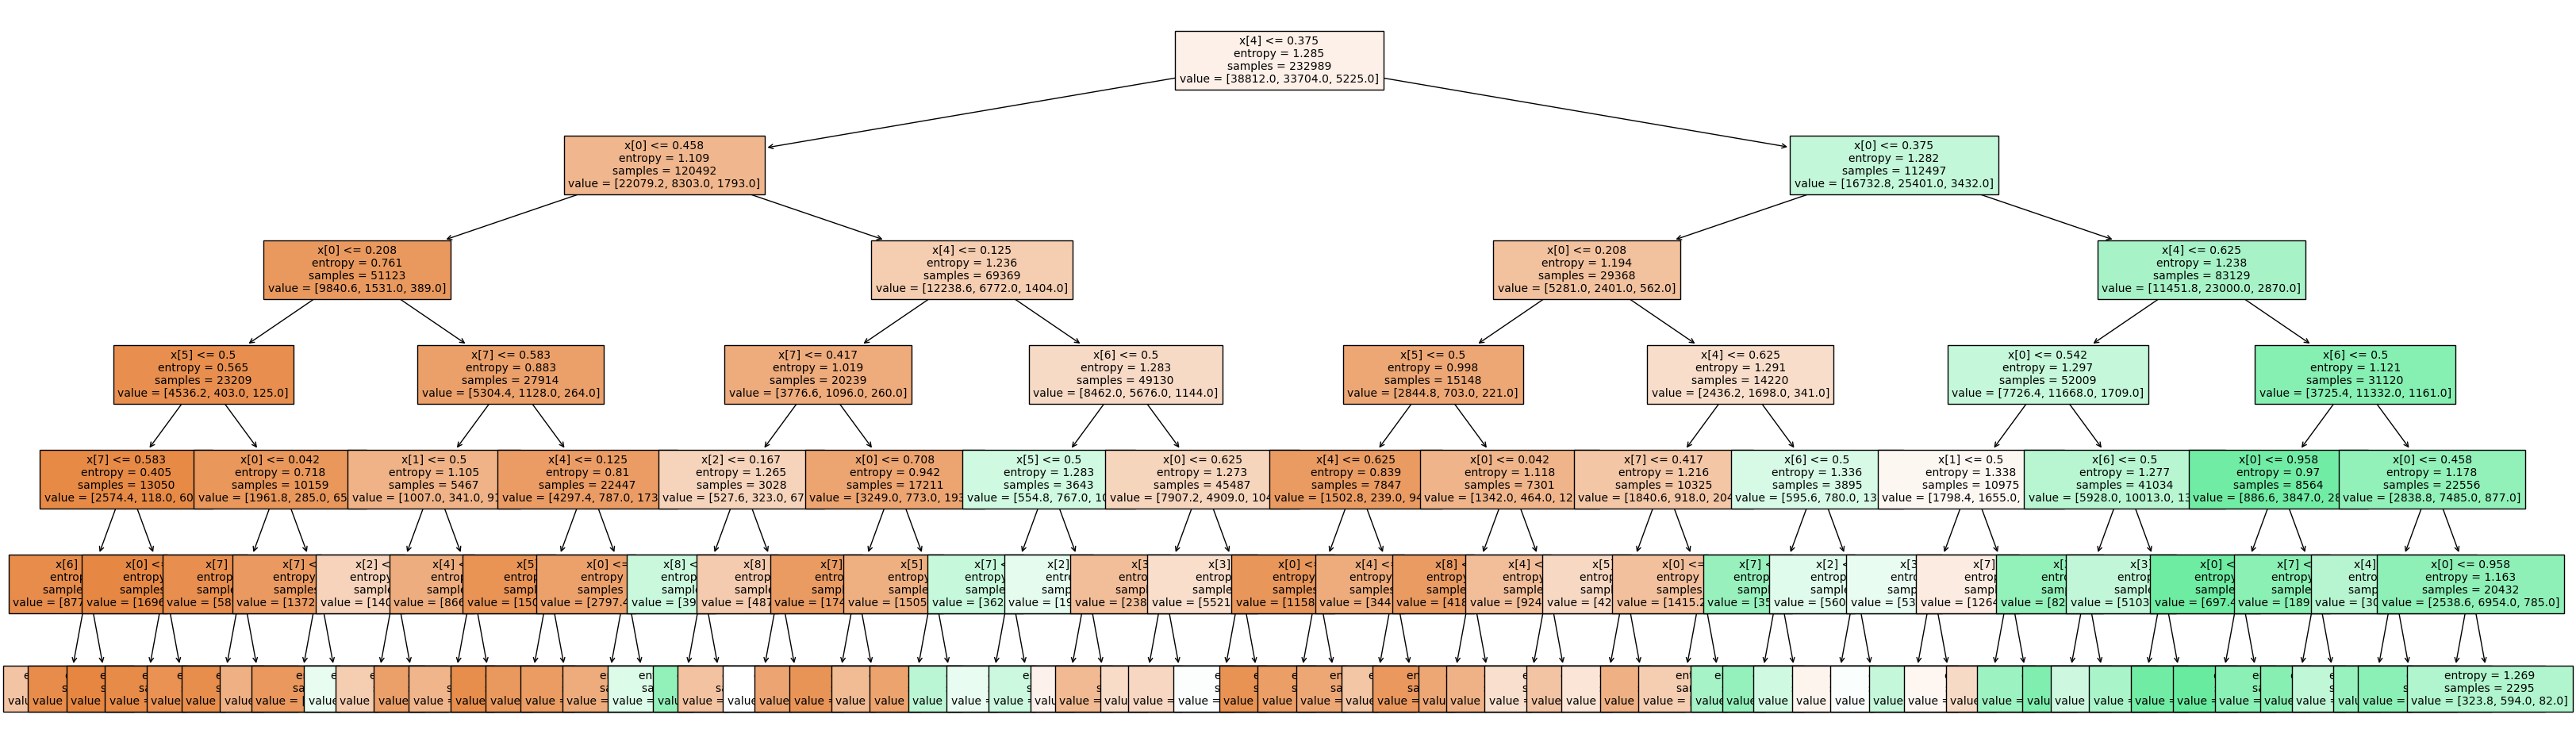

In [108]:
plt.figure(figsize=(40,12))
tree.plot_tree(DT,filled=True,fontsize=10)  
plt.savefig('tree.png')

# Comparation between Naive Beyes and Decision Tree

Text(0.5, 1.0, 'Decision Tree')

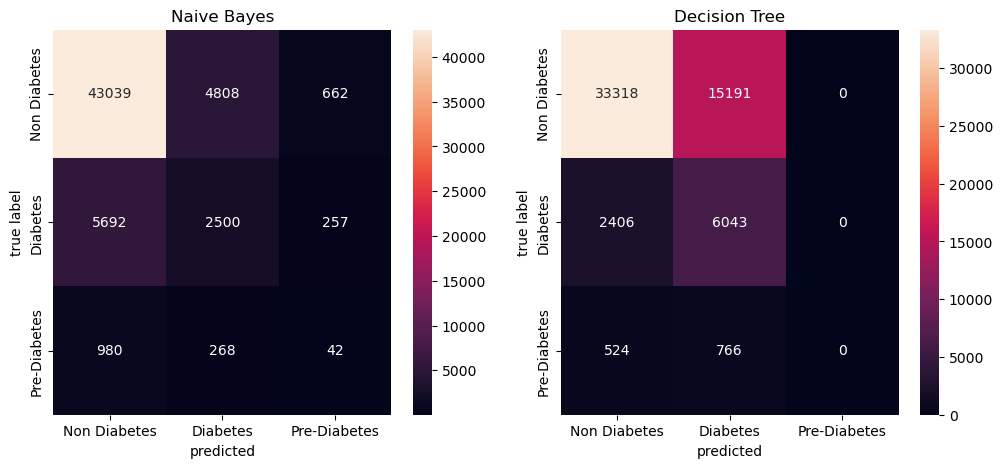

In [109]:
# Visualization
plt.figure(figsize=(12, 5))
grid = plt.GridSpec(1,2, hspace=0.3)
# naive bayes
plt.subplot(grid[0,0])
ax1 = sns.heatmap(cm_NB,annot=True,fmt='.0f',
                  xticklabels=['Non Diabetes','Diabetes','Pre-Diabetes'],
                  yticklabels=['Non Diabetes','Diabetes','Pre-Diabetes'])
ax1.set(xlabel="predicted", ylabel="true label")
plt.title('Naive Bayes')
# Decision Tree
plt.subplot(grid[0,1])
ax2 = sns.heatmap(cm_DT,annot=True,fmt='.0f',
                  xticklabels=['Non Diabetes','Diabetes','Pre-Diabetes'],
                  yticklabels=['Non Diabetes','Diabetes','Pre-Diabetes'])
ax2.set(xlabel="predicted", ylabel="true label")
plt.title('Decision Tree')

In [67]:
print('Naive Beyes:\n',report_NB,'\nDecision Tree:\n',report_DT)

Naive Beyes:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88     48509
           1       0.33      0.30      0.31      8449
           2       0.04      0.03      0.04      1290

    accuracy                           0.78     58248
   macro avg       0.41      0.41      0.41     58248
weighted avg       0.77      0.78      0.78     58248
 
Decision Tree:
               precision    recall  f1-score   support

           0       0.92      0.69      0.79     48509
           1       0.27      0.72      0.40      8449
           2       0.00      0.00      0.00      1290

    accuracy                           0.68     58248
   macro avg       0.40      0.47      0.39     58248
weighted avg       0.81      0.68      0.71     58248

